In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ODE Integration: Stellar structure

Consider the system of two ODEs describing a simple model of stellar structure 

$$\frac{dP}{dr} = -\frac{GM(r)}{r^{2}}\qquad \text{Hydrostatic Equilibrium}$$
$$\frac{dM}{dr} = 4\pi\rho r^{2}\qquad \text{Mass conservation}$$

To complete the set of equiations als requieres an Equation of state (EOS), i.e. a relation between density and pressure. Since we will not solve an internal energy equation, we will use a simplified EOS, that is barotropic $P = P(\rho)$. A posible choice is the polytropic EOS

$$P = K\rho^{\Gamma}$$

Where $K$ is the polytropic constant and $\Gamma$ is the adiabatic index, i.e. the ratio of the specific heats. A good kind of star model with a barotropic EOS is a white dwarf, which is supported by the pressure of degenerate electrons, in the case of a fully relativistically degenerate white dwarf, we have the values

$$K = 1.244\times10^{15}(0.5)^{\Gamma} \frac{dyne}{cm^{2}}\left(\frac{cm^{3}}{g}\right)^{\Gamma}$$
$$\Gamma = \frac{4}{3}$$

In this exercise, you will solve the simplified stellar structure equation by integrating them from the origin to the stellar surface using Forward Euler, RK2, and optionally also RK3 or RK4. You will demostrate the convergence.

### 1. In the code directory you will find a code skeleton for you to work from. Download it and study its structure 

For the initial value problemas , it is sufficient to consider the firts oder ordinary differential equation with an initial condition 

$$\frac{d\phi(t)}{dt} = f(t,\phi(t)); \qquad \phi(t_{o}) = \phi^{o}$$

Integrating the before equation we have the next equation

$$\int_{t_{n}}^{t_{n+1}}\frac{d\phi}{dt} = \phi^{n+1}-\phi^{n} = \int_{t_{n}}^{t_{n+1}}f(t,\phi(t))dt$$

The mean value theorem of calculus guarantees that if the integrand is evaluated at the proper point $t=\tau$ between $t_{n}$ and $t_{n+1}$, the integral is equal to $f(\tau,\phi(\tau))\Delta t$, but this is of little use since $\tau$ is unknow.



If the integral on the right hand side is estimated using the value of the integrand at the initial point , we have:

$$\phi^{n+1} = \phi^{n} + f(t_{n+1},\phi^{n+1})\Delta t$$


There are a number of definitions of stability in the literature. We shall use a rough definition that class a method stable if it produces a bounded solution when the solution of the underlying differential equation is also bounded. For the explicit Euler method, stability requires:

$$\left|1+\Delta t \frac{\partial f(t,\phi)}{\partial \phi}\right|<1$$



We need the dimensionless equation for this, we define a new variables, then

$$r^{*} = \frac{r}{L} \qquad dr^{*} = \frac{dr}{L}$$

$$P^{*} = \frac{P}{p} \qquad dP^{*} = \frac{dP}{p}$$

$$M^{*} = \frac{M}{m} \qquad dM^{*} = \frac{dM}{m}$$

$$rho^{*} = \frac{rho}{\alpha} $$


Now we have the differential equations and interchange the $^{*}$ variables 

$$\frac{dM}{dr} = B\rho r^{2} \qquad B \frac{4\pi \alpha L^{3}}{m}$$

$$\frac{dP}{dr} =-A\frac{M(r)}{r^{2}}\qquad A = \frac{Gm\alpha}{pL}$$

$$\rho = C(P)^{1/\Gamma}\qquad C = \frac{1}{\alpha}\left(\frac{p}{k}\right)^{1/\Gamma}$$


we choose the solar values for the scale of the system 



In [743]:
L = 6.957e8    #Solar radius (m)
alpha = 1408   #Solar mean density (Kg/m3)
m = 1.989e30   #Solar Mass (Kg)
G = 6.674e-11  #Gravitational constant m3/(Kgs2) 
p = 2.466e16   #Interior pressure on the sun (Pa)
gamma = 4/3.   #Adiabatic index
k = 1.244e15*((0.5*100e-1)**gamma)   #Polytropic constant 

A = (G*m*alpha)/(p*L)
B = (4*np.pi*alpha*L**3)/m
C = (1/alpha)*(p/k)**(1/gamma)

print("adiabatic index = ",gamma)
print("Polytropic index = ",k)




adiabatic index =  1.3333333333333333
Polytropic index =  1.0636050388329054e+16


The stability of the method use the expresion


$$\left|1+\Delta t \frac{\partial f(t,\phi)}{\partial \phi}\right|<1$$

Now

----


The evolution equations of the system are

$$M^{i+1} = M^{i} + (r^{i+1}-r^{i})f(r^{i})\qquad f(r^{i}) = B\rho r^{2}$$

$$P^{i+1} = P^{i} + (r^{i+1}-r^{i})g(r^{i})\qquad g(r^{i}) = -A\frac{M^{i}}{(r^{i})^{2}}\rho $$




# Euler Method

We tested the code with $n=1000$ points and outer radius of 2000 m

In [760]:
n = 1000
LL = 6600
r = np.linspace(0,LL,n)
r[0] = r[1]
M = np.zeros(n)
P = np.zeros(n)
rho = np.zeros(n)

rho[0] = 10e10*(1/1000)*(100e3) #kg/m3
P[0] = ((rho[0]/1)**gamma)*1e-10
M[0] = 0.0

def f(r,rho):
    #return B*rho*(r**2)
    return 4*np.pi*rho*(r**2)
    
def g(r,M,rho):
    #return -(A*M*rho)/r**2
    return -(G*M*rho)/r**2

for i in range(n-1):
    M[i+1] = M[i]+(r[i+1]-r[i])*f(r[i],rho[i])
    P[i+1] = P[i]+(r[i+1]-r[i])*g(r[i],M[i],rho[i])
    rho[i+1] = P[i]**(1/gamma)
        



Now we show the plots

2000km -->  0.0021561017680034496 solar radius


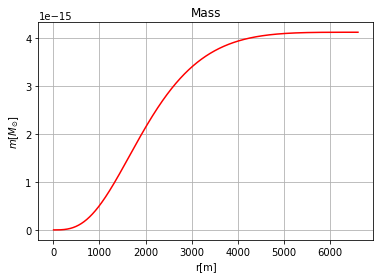

In [762]:
plt.plot(r,M/m,"r-")
plt.xlabel("r[m]")
plt.ylabel("$m[M_{\odot}]$")
plt.title("Mass")
plt.grid(True)
#plt.axvline(x=1500, color='k', linestyle='--')
print ("2000km --> ",1500e3/L,"solar radius")

#plt.yscale("log")

#plt.xscale("log")

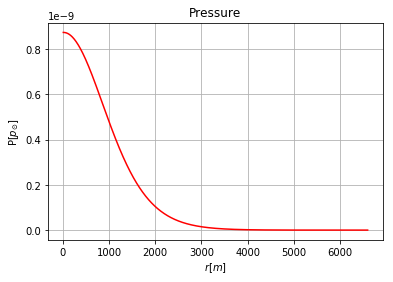

In [763]:
plt.plot(r,P/p,"r-")
plt.xlabel("$r[m]$")
plt.ylabel("P[$p_{\odot}$]")
plt.title("Pressure")
plt.grid(True)
#plt.yscale("log")
#plt.xscale("log")

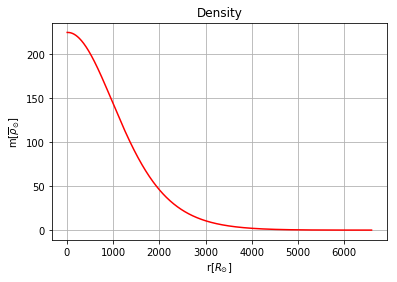

In [764]:
plt.plot(r[1:-1],rho[1:-1]/alpha,"r-")
plt.xlabel("r[$R_{\odot}$]")
plt.ylabel("m[$\overline{\\rho}_{\odot}$]")
plt.title("Density")
plt.grid(True)
#plt.yscale("log")
#plt.xscale("log")


# Runge-Kutta Methods

## Second order

The second order Runge-Kutta method consist of two steps . The first may be regarder as a half-step predictor based on the explicit Euler method; it is folled by a midpoint rule corrector whic makes the method second order:

$$\phi^{*}_{n+\frac{1}{2}} = \phi^{n} + \frac{\Delta t}{2}f(t_{n},\phi^{n})$$

$$\phi^{n+1} = \phi^{n} + \Delta t\ f(t_{n+\frac{1}{2}},\phi^{*}_{n+\frac{1}{2}})$$

this method is easy to use and is self-starting , only requires the initial condition data for the differential equation. It is very similar with the predictor corrector method 



In [771]:
n = 1000
LL = 600
#r = np.array([ i*dx for i in range(n)])
r = np.linspace(0,LL,n)
r[0] = 1.0*r[1]
M = np.zeros(n)
P = np.zeros(n)
rho = np.zeros(n)

rho[0] = 10e10*(1/1000)*(100e3) #kg/m3
P[0] = ((rho[0]/1)**gamma)*1e-10
M[0] = 0.0


for i in range(n-1):
    Mtemp = M[i] + 0.5*(r[i+1]-r[i])*f(r[i],rho[i])
    Ptemp = P[i] + 0.5*(r[i+1]-r[i])*g(r[i],Mtemp,rho[i])
    rhotemp = C*(Ptemp**(1/gamma))
    
    M[i+1] = M[i] + (r[i+1]-r[i])*f(0.5*r[i],rhotemp)
    P[i+1] = P[i] + (r[i+1]-r[i])*g(0.5*r[i],M[i],rhotemp)
    rho[i+1] = C*(P[i]**(1/gamma))
    
    

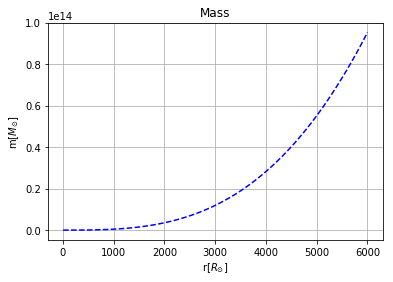

In [772]:
plt.plot(r,M,"b--")
plt.xlabel("r[$R_{\odot}$]")
plt.ylabel("m[$M_{\odot}$]")
plt.title("Mass")
plt.grid(True)

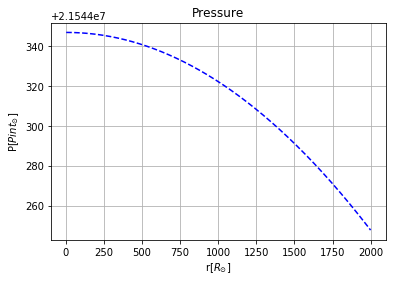

In [770]:
plt.plot(r,P,"b--")
plt.xlabel("r[$R_{\odot}$]")
plt.ylabel("P[$Pint_{\odot}$]")
plt.title("Pressure")
plt.grid(True)
#plt.yscale("log")
#plt.xscale("log")

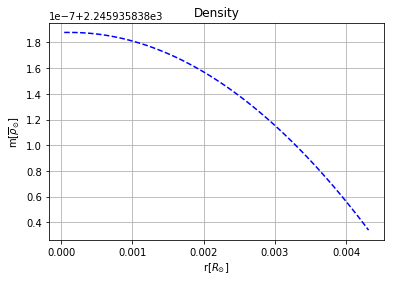

In [411]:
plt.plot(r[1:],rho[1:],"b--")
plt.xlabel("r[$R_{\odot}$]")
plt.ylabel("m[$\overline{\\rho}_{\odot}$]")
plt.title("Density")
plt.grid(True)
#plt.yscale("log")
#plt.xscale("log")

## Fourth order

Runge-Kutta methods of higher order have been developed;the most popular one is of fourth order. The first step two steps of this method use an explicit Euler predictor and an implicit Euler corrector at $t_{n+\frac{1}{2}}$. This is followed by a midpoint rule predictor for the full step and a Simpso'ns rule final corrector that gives the method its fourth order. The method is 

$$\phi^{*}_{n+\frac{1}{2}} = \phi^{n}+\frac{\Delta t}{2}f(t_{n},\phi^{n})$$

$$\phi^{**}_{n+\frac{1}{2}} = \phi^{n}+\frac{\Delta t}{2}f(t_{n+\frac{1}{2}},\phi^{*}_{n+\frac{1}{2}}$$

$$\phi^{**}_{n+1} = \phi^{n}+\Delta t\ f(t_{n+\frac{1}{2}},\phi^{**}_{n+\frac{1}{2}})$$

$$\phi^{n+1} = \phi^{n}+\frac{\Delta t}{6}\left[f(t_{n},\phi^{n}) +2f(t_{n+\frac{1}{2}},\phi^{*}_{n+\frac{1}{2}})+2f(t_{n+\frac{1}{2}},\phi^{**}_{n+\frac{1}{2}})+f(t_{n+1},\phi^{*}_{n+1})\right]$$

The major problem with the Runge-Kutta methods is that it is somewhat difficult to develop method of very high order and, as is readdily seen from the methods give above

In [397]:
2000e3/L

0.002874802357337933

6.606606606606608